In [1]:
import pandas as pd
import numpy as np
import urllib.request
from bs4 import BeautifulSoup

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import time
from datetime import datetime
from scipy import integrate, optimize
import warnings
warnings.filterwarnings('ignore')

# ML libraries
import lightgbm as lgb
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/covid19-global-forecasting-week-3/train.csv
/kaggle/input/covid19-global-forecasting-week-3/submission.csv
/kaggle/input/covid19-global-forecasting-week-3/test.csv
/kaggle/input/piping-data/piping_df.csv
/kaggle/input/pipingdata2/piping_df2.csv


In [3]:
import functools
from IPython.core.display import display, HTML
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 10000)

# Data reading and Visualization

In [4]:
piping_df=pd.read_csv("/kaggle/input/pipingdata2/piping_df2.csv")

In [5]:
piping_df.columns

Index(['Unnamed: 0', 'Day', 'Country1', 'Project', 'HSE restrictions',
       'Temperature/Heat index', 'Political issues', 'Material of Pipes ',
       'Pipes size in D.I', 'availability of Material', 'Holiday',
       'Pipe Fitter', 'Grinder', 'Pipe Welder (CS)', 'Pipe Welder (Argon)',
       'Riggers', 'Cranes', 'Fabricated Spools availability',
       'No of Inspectors for NDT Test',
       'Distance between the spools fabrication Workshop and site(L.M)',
       'Crews Nationality', 'Crew Experience', 'crew supervision',
       'Drawings availability', 'Work Front availability',
       'Working at heights', 'Erection', 'Month', 'Year', 'Daily_Rate'],
      dtype='object')

In [6]:
piping_df[piping_df['Country1']=='UAE'].tail()

,Unnamed: 0,Day,Country1,Project,HSE restrictions,Temperature/Heat index,Political issues,Material of Pipes,Pipes size in D.I,availability of Material,Holiday,Pipe Fitter,Grinder,Pipe Welder (CS),Pipe Welder (Argon),Riggers,Cranes,Fabricated Spools availability,No of Inspectors for NDT Test,Distance between the spools fabrication Workshop and site(L.M),Crews Nationality,Crew Experience,crew supervision,Drawings availability,Work Front availability,Working at heights,Erection,Month,Year,Daily_Rate
158863,158863,2017-12-27,UAE,project,YES,Low,NO,CS,Med,YES,No,98.0,294.0,98.0,0.0,196.0,49.0,High,Med,Low,Arab,High,High,High,High,NO,2254.0,12.0,2017.0,23.0
158864,158864,2017-12-28,UAE,project,YES,Low,NO,CS,High,NO,No,416.0,1664.0,832.0,0.0,1664.0,208.0,High,Med,Low,others,Low,High,High,High,NO,6240.0,12.0,2017.0,15.0
158865,158865,2017-12-29,UAE,project,YES,Low,NO,CS,Med,YES,No,115.0,345.0,115.0,0.0,230.0,57.5,High,Med,Low,Arab,High,High,High,High,NO,2875.0,12.0,2017.0,25.0
158866,158866,2017-12-30,UAE,project,YES,Low,NO,SS,High,YES,No,137.0,411.0,137.0,137.0,274.0,68.5,High,High,Low,others,High,High,High,Low,NO,1890.6,12.0,2017.0,13.8
158867,158867,2017-12-31,UAE,project,YES,Low,NO,CS,Low,YES,No,205.0,820.0,410.0,0.0,820.0,102.5,High,Med,Low,others,Low,High,High,Low,NO,5125.0,12.0,2017.0,25.0


In [7]:
piping_df.shape

(158868, 30)

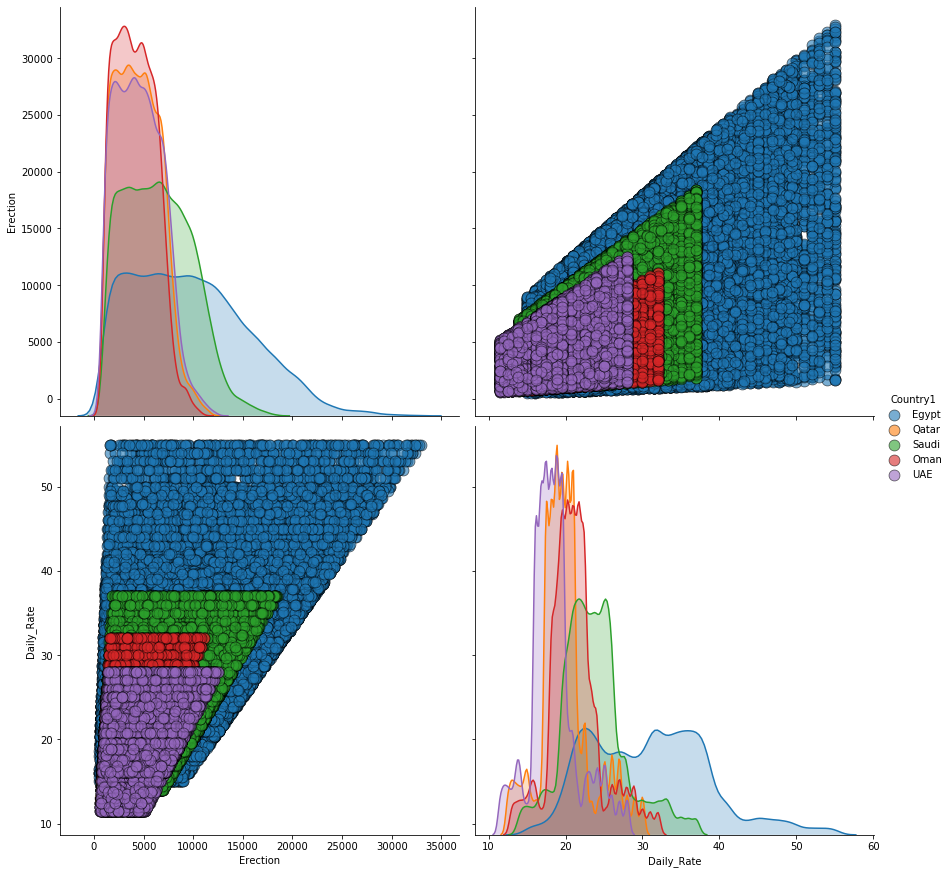

In [8]:
#sns.pairplot(piping_df,hue = 'Country1',diag_kind = 'kde',             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},             size = 4)
sns.pairplot(piping_df,hue = 'Country1',diag_kind = 'kde',
             vars = ['Erection','Daily_Rate'],
             plot_kws = {'alpha': 0.6, 's': 120, 'edgecolor': 'k'},
             size = 6)
#vars = ['Pipe Fitter', 'Grinder', 'Riggers','Cranes','Pipe Welder (Argon)','Pipe Welder (CS)']
#sns.legend(size = 14)
# Title 
#plt.suptitle('Pair Plot of Skilled Labours',             size = 28);

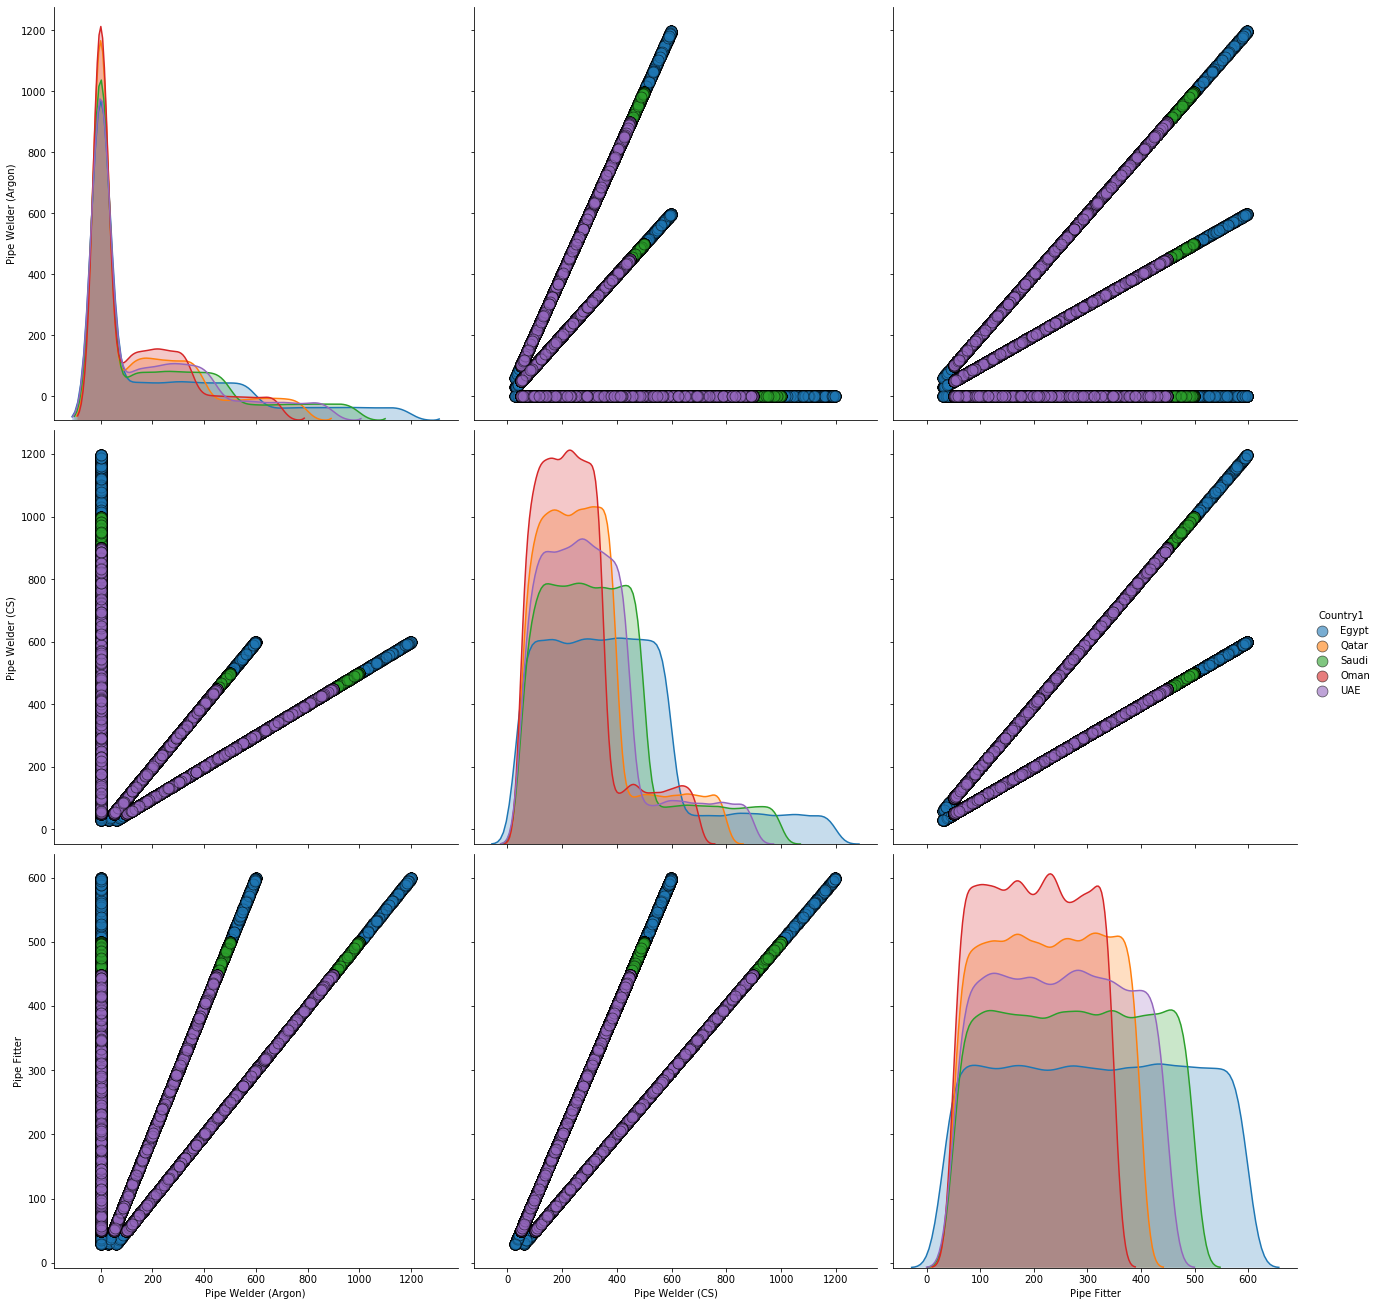

In [9]:
#sns.pairplot(piping_df,hue = 'Country1',diag_kind = 'kde',             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},             size = 4)
sns.pairplot(piping_df,hue = 'Country1',diag_kind = 'kde',
             vars = ['Pipe Welder (Argon)','Pipe Welder (CS)','Pipe Fitter'],
             plot_kws = {'alpha': 0.6, 's': 120, 'edgecolor': 'k'},
             size = 6)
#vars = ['Pipe Fitter', 'Grinder', 'Riggers','Cranes','Pipe Welder (Argon)','Pipe Welder (CS)']
#sns.legend(size = 14)
# Title 
#plt.suptitle('Pair Plot of Skilled Labours',             size = 28);

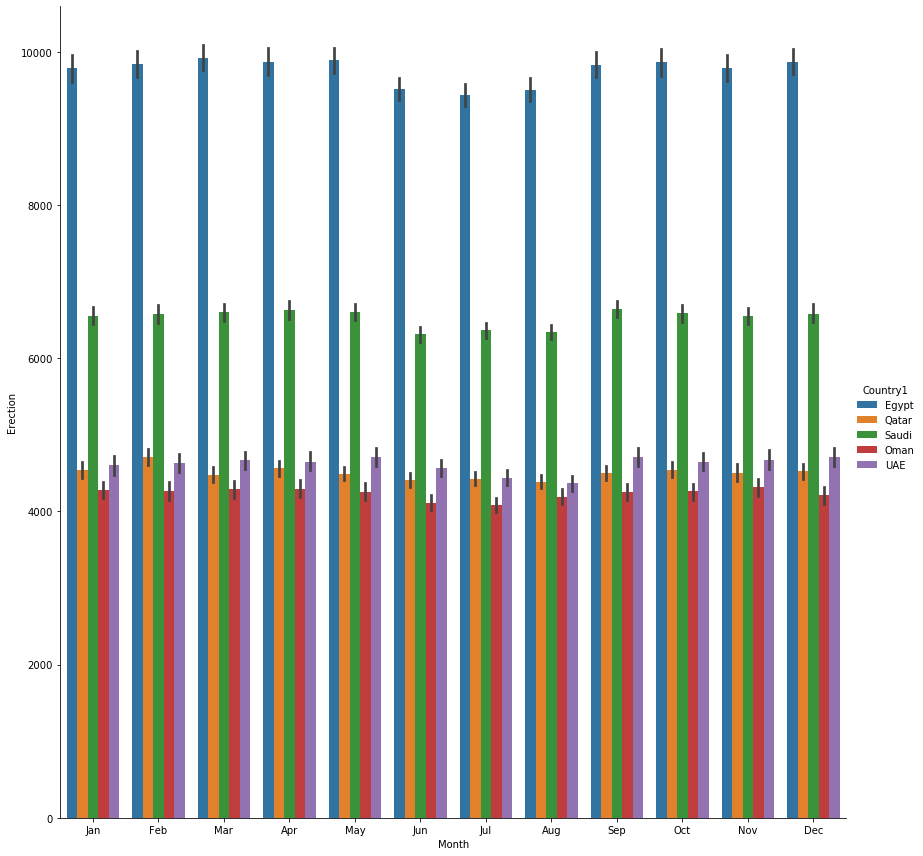

In [10]:
import calendar
import datetime
import seaborn as sns
#box, violin, strip
selected_data=grouped_countries=piping_df.groupby(['Country1','Month'], as_index=False)["Erection"].mean()

HUE=piping_df['Country1']
Y=piping_df['Erection']
piping_df['Month']=piping_df['Month'].astype(int)
piping_df['Month'] = piping_df['Month'].apply(lambda x: calendar.month_abbr[x])
X=piping_df['Month']



#HUE=Combined_all_data[(Combined_all_data['offer_id'] != '0')&( Combined_all_data['event'] == 'offer completed')]['offer_id']
#Y=Combined_all_data[(Combined_all_data['offer_id'] != '0' )&( Combined_all_data['event'] == 'offer completed') ]['age']
#X=Combined_all_data[(Combined_all_data['offer_id'] != '0') & (Combined_all_data['event'] == 'offer completed')]['gender']
sns.factorplot(x='Month', y='Erection' , data=piping_df, hue='Country1',size=12,kind='bar', aspect=1)
plt.savefig("Piping erection average per Month"+".png", bbox_inches='tight')

In [ ]:
import seaborn as sns
#box, violin, strip
selected_data=grouped_countries=piping_df.groupby(['Country1','Month'], as_index=False)["Erection"].mean()

HUE=piping_df['Country1']
Y=piping_df['Daily_Rate']
X=piping_df['Month']

#HUE=Combined_all_data[(Combined_all_data['offer_id'] != '0')&( Combined_all_data['event'] == 'offer completed')]['offer_id']
#Y=Combined_all_data[(Combined_all_data['offer_id'] != '0' )&( Combined_all_data['event'] == 'offer completed') ]['age']
#X=Combined_all_data[(Combined_all_data['offer_id'] != '0') & (Combined_all_data['event'] == 'offer completed')]['gender']
sns.factorplot(x='Month', y='Daily_Rate' , data=piping_df, hue='Country1',size=12,kind='bar', aspect=1)
plt.savefig("Piping average Daily Production rate per Month"+".png", bbox_inches='tight')

In [ ]:
import seaborn as sns
#box, violin, strip
selected_data=grouped_countries=piping_df.groupby(['Country1','Year'], as_index=False)["Erection"].mean()

HUE=piping_df['Country1']
Y=piping_df['Erection']
X=piping_df['Year']

#HUE=Combined_all_data[(Combined_all_data['offer_id'] != '0')&( Combined_all_data['event'] == 'offer completed')]['offer_id']
#Y=Combined_all_data[(Combined_all_data['offer_id'] != '0' )&( Combined_all_data['event'] == 'offer completed') ]['age']
#X=Combined_all_data[(Combined_all_data['offer_id'] != '0') & (Combined_all_data['event'] == 'offer completed')]['gender']
sns.factorplot(x='Year', y='Erection' , data=selected_data, hue='Country1',size=12,kind='bar', aspect=1)
plt.savefig("Piping erection average per Year"+".png", bbox_inches='tight')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#box, violin, strip
selected_data=piping_df[(piping_df['Temperature/Heat index']=='Low') & (piping_df['Political issues']=='NO')& (piping_df['availability of Material']=='YES') & (piping_df['Holiday']=='No') & (piping_df['Fabricated Spools availability']=='High')& (piping_df['Distance between the spools fabrication Workshop and site(L.M)']=='Low') & (piping_df['Crew Experience']=='High') & (piping_df['crew supervision']=='High') & (piping_df['Work Front availability']=='High')& (piping_df['Drawings availability']=='High') & (piping_df['Working at heights']=='NO')]

HUE=piping_df['Country1']
Y=piping_df['Daily_Rate']
X=piping_df['Year']

#HUE=Combined_all_data[(Combined_all_data['offe]r_id'] != '0')&( Combined_all_data['event'] == 'offer completed')]['offer_id']
#Y=Combined_all_data[(Combined_all_data['offer_id'] != '0' )&( Combined_all_data['event'] == 'offer completed') ]['age']
#X=Combined_all_data[(Combined_all_data['offer_id'] != '0') & (Combined_all_data['event'] == 'offer completed')]['gender']
sns.factorplot(x='Year', y='Daily_Rate' , data=selected_data, hue='Country1',size=12,kind='bar', aspect=1)
plt.savefig("Piping average Daily Production rate per Year Execluding unusual Circumstances"+".png", bbox_inches='tight')

In [ ]:
import seaborn as sns
#box, violin, strip
selected_data=piping_df[(piping_df['Temperature/Heat index']=='Low') & (piping_df['Political issues']=='NO')& (piping_df['availability of Material']=='YES') & (piping_df['Holiday']=='No') & (piping_df['Fabricated Spools availability']=='High')& (piping_df['Distance between the spools fabrication Workshop and site(L.M)']=='Low') & (piping_df['Crew Experience']=='High') & (piping_df['crew supervision']=='High') & (piping_df['Work Front availability']=='High')& (piping_df['Drawings availability']=='High') & (piping_df['Working at heights']=='NO')]

HUE=piping_df['Country1']
Y=piping_df['Daily_Rate']
X=piping_df['Year']

#HUE=Combined_all_data[(Combined_all_data['offe]r_id'] != '0')&( Combined_all_data['event'] == 'offer completed')]['offer_id']
#Y=Combined_all_data[(Combined_all_data['offer_id'] != '0' )&( Combined_all_data['event'] == 'offer completed') ]['age']
#X=Combined_all_data[(Combined_all_data['offer_id'] != '0') & (Combined_all_data['event'] == 'offer completed')]['gender']
sns.factorplot(x='Year', y='Daily_Rate' , data=piping_df, hue='Country1',size=12,kind='bar', aspect=1)
plt.savefig("Piping average Daily Production rate per Year"+".png", bbox_inches='tight')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#box, violin, strip
selected_data=piping_df

HUE=piping_df['Country1']
Y=piping_df['Riggers']
X=piping_df['Year']

#HUE=Combined_all_data[(Combined_all_data['offe]r_id'] != '0')&( Combined_all_data['event'] == 'offer completed')]['offer_id']
#Y=Combined_all_data[(Combined_all_data['offer_id'] != '0' )&( Combined_all_data['event'] == 'offer completed') ]['age']
#X=Combined_all_data[(Combined_all_data['offer_id'] != '0') & (Combined_all_data['event'] == 'offer completed')]['gender']
sns.factorplot(x='Year', y='Riggers' , data=piping_df, hue='Country1',size=12,kind='bar', aspect=1)
plt.savefig("Average number of Riggers per Year"+".png", bbox_inches='tight')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#box, violin, strip
selected_data=piping_df

HUE=piping_df['Country1']
Y=piping_df['Grinder']
X=piping_df['Year']

#HUE=Combined_all_data[(Combined_all_data['offe]r_id'] != '0')&( Combined_all_data['event'] == 'offer completed')]['offer_id']
#Y=Combined_all_data[(Combined_all_data['offer_id'] != '0' )&( Combined_all_data['event'] == 'offer completed') ]['age']
#X=Combined_all_data[(Combined_all_data['offer_id'] != '0') & (Combined_all_data['event'] == 'offer completed')]['gender']
sns.factorplot(x='Year', y='Grinder' , data=piping_df, hue='Country1',size=12,kind='bar', aspect=1)
plt.savefig("Average number of Grinders per Year"+".png", bbox_inches='tight')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#box, violin, strip
selected_data=piping_df[(piping_df['Country1'] != 'Egypt')]

HUE=piping_df['Country1']
Y=piping_df['Pipe Fitter']
X=piping_df['Year']

#HUE=Combined_all_data[(Combined_all_data['offe]r_id'] != '0')&( Combined_all_data['event'] == 'offer completed')]['offer_id']
#Y=Combined_all_data[(Combined_all_data['offer_id'] != '0' )&( Combined_all_data['event'] == 'offer completed') ]['age']
#X=Combined_all_data[(Combined_all_data['offer_id'] != '0') & (Combined_all_data['event'] == 'offer completed')]['gender']
sns.factorplot(x='Year', y='Pipe Fitter' , data=piping_df, hue='Country1',size=12,kind='bar', aspect=1)
plt.savefig("Average number of Pipe Fitters per Year"+".png", bbox_inches='tight')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#box, violin, strip
selected_data=piping_df[(piping_df['Country1'] != 'Egypt')]

HUE=piping_df['Country1']
Y=piping_df['Pipe Welder (CS)']
X=piping_df['Year']

#HUE=Combined_all_data[(Combined_all_data['offe]r_id'] != '0')&( Combined_all_data['event'] == 'offer completed')]['offer_id']
#Y=Combined_all_data[(Combined_all_data['offer_id'] != '0' )&( Combined_all_data['event'] == 'offer completed') ]['age']
#X=Combined_all_data[(Combined_all_data['offer_id'] != '0') & (Combined_all_data['event'] == 'offer completed')]['gender']
sns.factorplot(x='Year', y='Pipe Welder (CS)' , data=piping_df, hue='Country1',size=12,kind='bar', aspect=1)
plt.savefig("Average number of Pipe Welders(CS) per Year"+".png", bbox_inches='tight')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#box, violin, strip
selected_data=piping_df[(piping_df['Country1'] != 'Egypt')]

HUE=piping_df['Country1']
Y=piping_df['Pipe Welder (Argon)']
X=piping_df['Year']

#HUE=Combined_all_data[(Combined_all_data['offe]r_id'] != '0')&( Combined_all_data['event'] == 'offer completed')]['offer_id']
#Y=Combined_all_data[(Combined_all_data['offer_id'] != '0' )&( Combined_all_data['event'] == 'offer completed') ]['age']
#X=Combined_all_data[(Combined_all_data['offer_id'] != '0') & (Combined_all_data['event'] == 'offer completed')]['gender']
sns.factorplot(x='Year', y='Pipe Welder (Argon)' , data=piping_df, hue='Country1',size=12,kind='bar', aspect=1)
plt.savefig("Average number of Pipe Welders (Argon) per Year"+".png", bbox_inches='tight')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#box, violin, strip
selected_data=piping_df[(piping_df['Country1'] != 'Egypt')]

HUE=piping_df['Country1']
Y=piping_df['Cranes']
X=piping_df['Year']

#HUE=Combined_all_data[(Combined_all_data['offe]r_id'] != '0')&( Combined_all_data['event'] == 'offer completed')]['offer_id']
#Y=Combined_all_data[(Combined_all_data['offer_id'] != '0' )&( Combined_all_data['event'] == 'offer completed') ]['age']
#X=Combined_all_data[(Combined_all_data['offer_id'] != '0') & (Combined_all_data['event'] == 'offer completed')]['gender']
sns.factorplot(x='Year', y='Cranes' , data=piping_df, hue='Country1',size=12,kind='bar', aspect=1)
plt.savefig("Average number of  Cranes per Year"+".png", bbox_inches='tight')

# Data Preparation for Modeling

In [ ]:
modeled_data=piping_df.copy()

## converting categorial data to dummies

In [ ]:
dummies_list=['Country1', 'HSE restrictions','Temperature/Heat index', 'Political issues', 'Material of Pipes ','Month','Year','Pipes size in D.I',
       'availability of Material', 'Holiday','Fabricated Spools availability','Distance between the spools fabrication Workshop and site(L.M)',
       'Crews Nationality', 'Crew Experience', 'crew supervision','Drawings availability', 'Work Front availability','Working at heights']


for col in dummies_list:
    dummy = pd.get_dummies(modeled_data[col]).rename(columns=lambda x: col+'_' +str(x))
    modeled_data = pd.concat([modeled_data, dummy], axis = 1)
modeled_data.drop(dummies_list, axis=1, inplace = True) 


In [ ]:
modeled_data.info()

## Applying minmax Scaler to numerical Data

In [ ]:

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
modeled_data[['Pipe Fitter', 'Grinder', 'Pipe Welder (CS)', 'Pipe Welder (Argon)','Daily_Rate',
       'Riggers', 'Cranes']]= mms.fit_transform(modeled_data[['Pipe Fitter', 'Grinder', 'Pipe Welder (CS)', 'Pipe Welder (Argon)','Daily_Rate',
       'Riggers', 'Cranes']])


In [ ]:
import seaborn as sb
C_mat = modeled_data.corr()
fig = plt.figure(figsize = (45,45))
sb.heatmap(C_mat, vmax = 0.4,annot=True, square = True,annot_kws={'size':14},cbar=True,linewidths=4)
sb.set(font_scale=3)
plt.show()
plt.savefig("Heat Map"+".png", bbox_inches='tight')

In [ ]:
C_mat = modeled_data.corr()
#Correlation with output variable
cor_target = C_mat["Erection"]
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.01].sort_values(ascending=False)
relevant_features

In [ ]:
C_mat = modeled_data.corr()
#Correlation with output variable
cor_target = C_mat["Erection"]
#Selecting highly correlated features
relevant_features = cor_target[cor_target<(-0.01)].sort_values()
relevant_features

In [ ]:
modeled_data.columns

## Selecting Features

In [ ]:
'''Features=['Pipe Fitter', 'Grinder',
       'Pipe Welder (CS)', 'Pipe Welder (Argon)', 'Riggers', 'Cranes',
         'Country1_Egypt','Month_1', 'Month_2', 'Month_3', 'Month_4','Year_2005', 'Year_2006', 'Year_2007',
       'Year_2008', 'Year_2009', 'Year_2010', 'Year_2011', 'Year_2012',
       'Year_2013', 'Year_2014', 'Year_2015', 'Year_2016', 'Year_2017',
       'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10',
       'Month_11', 'Month_12','Country1_Oman', 'Country1_Qatar', 'Country1_Saudi', 'Country1_UAE',
       'HSE restrictions_NO', 'HSE restrictions_YES',
       'Temperature/Heat index_High', 'Temperature/Heat index_Low',
       'Political issues_NO', 'Political issues_YES', 'Material of Pipes _CS',
       'Material of Pipes _Duplex', 'Material of Pipes _LT',
       'Material of Pipes _SS', 'availability of Material_NO',
       'availability of Material_YES', 'Holiday_No', 'Holiday_Yes',
       'Fabricated Spools availability_High', 'Pipes size in D.I_High', 'Pipes size in D.I_Low',
       'Pipes size in D.I_Med',
       'Fabricated Spools availability_Low',
       'Distance between the spools fabrication Workshop and site(L.M)_High',
       'Distance between the spools fabrication Workshop and site(L.M)_Low',
       'Crews Nationality_Arab', 'Crews Nationality_others',
       'Crew Experience_High', 'Crew Experience_Low', 'crew supervision_High',
       'crew supervision_Low', 'Drawings availability_High',
       'Drawings availability_Low', 'Work Front availability_High',
       'Work Front availability_Low', 'Working at heights_NO',
       'Working at heights_YES']'''
Features=['Pipe Fitter', 'Grinder',
       'Pipe Welder (CS)', 'Pipe Welder (Argon)', 'Riggers', 'Cranes',
         'Country1_Egypt','Country1_Oman', 'Country1_Qatar', 'Country1_Saudi', 'Country1_UAE',
       'HSE restrictions_NO', 'HSE restrictions_YES',
       'Temperature/Heat index_High', 'Temperature/Heat index_Low',
       'Political issues_NO', 'Political issues_YES', 'Material of Pipes _CS',
       'Material of Pipes _Duplex', 'Material of Pipes _LT',
       'Material of Pipes _SS', 'availability of Material_NO',
       'availability of Material_YES', 'Holiday_No', 'Holiday_Yes',
       'Fabricated Spools availability_High', 'Pipes size in D.I_High', 'Pipes size in D.I_Low',
       'Pipes size in D.I_Med',
       'Fabricated Spools availability_Low',
       'Distance between the spools fabrication Workshop and site(L.M)_High',
       'Distance between the spools fabrication Workshop and site(L.M)_Low',
       'Crews Nationality_Arab', 'Crews Nationality_others',
       'Crew Experience_High', 'Crew Experience_Low', 'crew supervision_High',
       'crew supervision_Low', 'Drawings availability_High',
       'Drawings availability_Low', 'Work Front availability_High',
       'Work Front availability_Low', 'Working at heights_NO',
       'Working at heights_YES']

In [ ]:
from sklearn.utils import shuffle
def prepare_Modeled_data(data):
    """Shuffling data."""
    data_train = data[Features]
    labels_train = data['Erection']
 
    
    #Shuffle reviews and corresponding labels within training and test sets
    data_train, labels_train = shuffle(data_train, labels_train)
    
    return data_train, labels_train

features,labels=prepare_Modeled_data(modeled_data)






In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_dev, y_train, y_dev = train_test_split(features,labels, test_size=0.10, random_state=42)

print(X_dev.shape)
print(y_dev.shape)

In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
k =5
kmeans = MiniBatchKMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X_train)

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_train)
            
print(pca.components_)
print(pca.explained_variance_)

In [ ]:
title_font = {'fontname':'Arial', 'size':'18', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'14'}
import seaborn as sns
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("muted", len(set(y_pred)))

# plot
sns.scatterplot(pca_result[:,0], pca_result[:,1], hue=y_pred,sizes =100, legend='full',palette=palette)
plt.title("PCA - Clustered (K-Means)",**title_font,bbox={'facecolor':'0.8', 'pad':5})
plt.savefig("Kmeans"+".png", bbox_inches='tight')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=pca_result[:,0], 
    ys=pca_result[:,1], 
    zs=pca_result[:,2], 
    c=y_pred, 
    cmap='tab10'
)
ax.set_xlabel('pca-1')
ax.set_ylabel('pca-2')
ax.set_zlabel('pca-3')

plt.title("PCA - Clustered (K-Means)-3D",**title_font,bbox={'facecolor':'0.9', 'pad':2})
plt.savefig("Kmeans_3D"+".png", bbox_inches="tight")
plt.show()

## Keras regressor

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.wrappers.scikit_learn import KerasRegressor
from keras import regularizers
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
def base_model():
    model = Sequential()
    model.add(Dense(200, input_dim=X_train.shape[1],kernel_regularizer = regularizers.l2(0.01), kernel_initializer='normal' ,activation='relu'))
    model.add(Dense(100,kernel_regularizer = regularizers.l2(0.01), kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adamax')
    return model



In [ ]:
model = KerasRegressor(build_fn=base_model, verbose=0)
batch_size = [50]
epochs = [20,30,40]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid,scoring='neg_mean_squared_error',n_jobs=2)
grid_result = grid.fit(X_train.values, y_train.values)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
def base_model(l1=200,l2=100):
    model = Sequential()
    model.add(Dense(l1, input_dim=X_train.shape[1],kernel_regularizer = regularizers.l2(0.01), kernel_initializer='normal' ,activation='relu'))
    model.add(Dense(l2,kernel_regularizer = regularizers.l2(0.01), kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal',activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='Adamax')
    return model

model = KerasRegressor(build_fn=base_model, verbose=0, epochs=50, batch_size=50)
l1 = [200,300]
l2 = [50,100]
param_grid = dict(l1=l1, l2=l2)
grid = GridSearchCV(estimator=model, param_grid=param_grid,scoring='neg_mean_squared_error')
grid_result = grid.fit(X_train.values, y_train.values)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
opt = Adam(lr=1e-3, decay=1e-3 / 200)
def base_model():
    alpha=.00001
    model = Sequential()
    model.add(Dense(300, input_dim=X_train.shape[1],kernel_regularizer = regularizers.l2(0.01), kernel_initializer='normal' ,activation='relu'))
    model.add(Dense(50,kernel_regularizer = regularizers.l2(0.01), kernel_initializer='normal',activation='relu',))
    model.add(Dense(1, kernel_initializer='normal',activation='linear'))
    model.compile(loss='mean_squared_error', optimizer= opt)
    return model

reg = KerasRegressor(build_fn=base_model, epochs=50, batch_size=100,verbose=1,validation_split=0.1)
kfold = KFold(n_splits=5, random_state=43)
results = np.sqrt(-1*cross_val_score(reg, X_train.values, y_train.values,scoring= "neg_mean_squared_error", cv=kfold))
print("Training RMSE mean and std from CV: {} {}".format(results.mean(),results.std()))

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=7)
history=reg.fit(X_train.values, y_train.values,epochs=50, batch_size=100, verbose=1, validation_split=0.1,callbacks=[es])
prediction=reg.predict(X_dev.values)
result = np.sqrt(mean_squared_error(y_dev,prediction))
print("KerasRegressor_RMSE: {}".format(result))

In [ ]:
pip install PyYAML

In [ ]:
from keras.models import model_from_json

In [ ]:
reg.model.save('saved_model.h5')

In [ ]:
from keras.models import load_model

# Instantiate the model as you please (we are not going to use this)
model2 = KerasRegressor(build_fn=base_model, epochs=10, batch_size=10, verbose=1)

# This is where you load the actual saved model into new variable.
model2.model = load_model('/kaggle/input/kerasmodel/saved_model.h5')

# Now you can use this to predict on new data (without fitting model2, because it uses the older saved model)
model2.predict(X_new)

In [ ]:
#MinMaxScaler().fit_transform(X_new[0, :].reshape(1, -1))

In [ ]:
from numpy import array
Pipe_Fitter=300
Grinder=600
Pipe_Welder_CS=400
Pipe_Welder_Argon=0
Riggers=500
Cranes=350
Country1_Egypt=0
Country1_Oman=1
Country1_Qatar=0
Country1_Saudi=0
Country1_UAE=0
HSE_restrictions_NO=1
HSE_restrictions_YES=0
Temperature_Heat_index_High=0
Temperature_Heat_index_Low=1
Political_issues_NO=1
Political_issues_YES=0
Material_of_Pipes_CS=1
Material_of_Pipes_Duplex=0
Material_of_Pipes_LT=0
Material_of_Pipes_SS=0
availability_of_Material_NO=0
availability_of_Material_YES=1
Holiday_No=1
Holiday_Yes=0
Fabricated_Spools_availability_High=1
Pipessize_DI_High=0
Pipessize_DI_Low=0
Pipessize_DI_Med=1
Fabricated_Spools_availability_Low=0
Distance=0
Distance=1
Nationality_Arab=1
Nationality_others=0
Experience_High=1
Experience_Low=0
supervision_High=0
supervision_Low=0
Drawings_availability_High=1
Drawings_availability_Low=0
Work_Front_availability_High=1
Work_Front_availability_Low=0
Working_at_heights_NO=1
Working_at_heights_YES=0
X_new=array([[Pipe_Fitter,
Grinder,
Pipe_Welder_CS,
Pipe_Welder_Argon,
Riggers,
Cranes,
Country1_Egypt,
Country1_Oman,
Country1_Qatar,
Country1_Saudi,
Country1_UAE,
HSE_restrictions_NO,
HSE_restrictions_YES,
Temperature_Heat_index_High,
Temperature_Heat_index_Low,
Political_issues_NO,
Political_issues_YES,
Material_of_Pipes_CS,
Material_of_Pipes_Duplex,
Material_of_Pipes_LT,
Material_of_Pipes_SS,
availability_of_Material_NO,
availability_of_Material_YES,
Holiday_No,
Holiday_Yes,
Fabricated_Spools_availability_High,
Pipessize_DI_High,
Pipessize_DI_Low,
Pipessize_DI_Med,
Fabricated_Spools_availability_Low,
Distance,
Distance,
Nationality_Arab,
Nationality_others,
Experience_High,
Experience_Low,
supervision_High,
supervision_Low,
Drawings_availability_High,
Drawings_availability_Low,
Work_Front_availability_High,
Work_Front_availability_Low,
Working_at_heights_NO,
Working_at_heights_YES]])

In [ ]:
prediction_new=reg.predict(X_new)
prediction_new

In [ ]:
'''diff = prediction- y_dev
percentDiff = (diff / y_dev) * 100
absPercentDiff = np.abs(percentDiff)
# compute the mean and standard deviation of the absolute percentage
# difference
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)
mean,std'''

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
models = Sequential()
models.add(Dense(300, input_dim=X_train.shape[1],kernel_regularizer = regularizers.l2(0.01), kernel_initializer='normal' ,activation='relu'))
models.add(Dense(50,kernel_regularizer = regularizers.l2(0.01), kernel_initializer='normal',activation='relu',))
models.add(Dense(1, kernel_initializer='normal',activation='linear'))
models.compile(loss='mean_squared_error', optimizer= opt)
plot_model(models, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
reg.model.summary()

In [ ]:
# Plot network
axis_font = {'fontname':'Arial', 'size':'40'}
fig, (ax1) = plt.subplots(1, 1, figsize=(60,20))
plt.plot(history.history['loss'], label='Adam Regularized')
plt.xlabel('Epochs',**axis_font)
plt.ylabel('loss',**axis_font)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.legend()
plt.show()


In [ ]:
from sklearn.inspection import permutation_importance
results = permutation_importance(reg, X_train, y_train, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
#pyplot.bar([x for x in range(len(importance))], importance)
#pyplot.show()

important_features_list = sorted(importance,reverse=True)
fig, (ax1) = plt.subplots(1, 1, figsize=(60,20))
plt.yscale('log', nonposy='clip')
plt.bar(range(len(important_features_list)), important_features_list, align='center')
plt.xticks(range(len(important_features_list)), features, rotation='vertical',fontsize=40)
plt.yticks(fontsize=40)
plt.title('Keras Regressor-Features importance')
plt.ylabel('Importance',fontsize=40)
plt.xlabel('Features',fontsize=40)
plt.savefig("Keras Regressor-Features importance"+".png", bbox_inches='tight')
plt.show()

# Linera regression

In [ ]:
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 10000)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


regression=LinearRegression()
regression.fit(X_train.values, y_train.values)
y_pred_linear_regression=regression.predict(X_dev.values)
y_Actual=y_dev
Linear_RMSE=sqrt(mean_squared_error(y_Actual,y_pred_linear_regression))
print('Linear Regression_RMSE:',Linear_RMSE)

In [ ]:
from sklearn.inspection import permutation_importance
results = permutation_importance(regression, X_train, y_train, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
#pyplot.bar([x for x in range(len(importance))], importance)
#pyplot.show()

important_features_list = sorted(importance,reverse=True)
fig, (ax1) = plt.subplots(1, 1, figsize=(60,20))
plt.yscale('log', nonposy='clip')
plt.bar(range(len(important_features_list)), important_features_list, align='center')
plt.xticks(range(len(important_features_list)), features, rotation='vertical',fontsize=40)
plt.yticks(fontsize=40)
plt.title('Linear Regression-Features importance')
plt.ylabel('Importance',fontsize=40)
plt.xlabel('Features',fontsize=40)
plt.savefig("Linear Regression-Features importance"+".png", bbox_inches='tight')
plt.show()


In [ ]:
'''diff = y_pred_linear_regression - y_Actual
percentDiff = (diff / y_Actual) * 100
absPercentDiff = np.abs(percentDiff)
# compute the mean and standard deviation of the absolute percentage
# difference
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)
mean,std'''

In [ ]:
#print('Linear Regression: R^2 score on training set', regression.score(X_train, y_train)*100)
#print('Linear Regression: R^2 score on test set', regression.score(X_dev, y_dev)*100)

# Elastic Model

In [ ]:
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=5)

In [ ]:
search.fit(X_train.values, y_train.values)
search.best_params_

In [ ]:
elastic=ElasticNet(normalize=True,alpha=1e-05,l1_ratio=0.8)
elastic.fit(X_train.values, y_train.values)
y_pred_linear_elastic=elastic.predict(X_dev.values)
y_Actual=y_dev
elastic_model_RMSE=sqrt(mean_squared_error(y_Actual,y_pred_linear_elastic))
print('Elastic Regression_RMSE:',elastic_model_RMSE)

In [ ]:
#print('Linear Regression: R^2 score on training set', elastic.score(X_train, y_train)*100)
#print('Linear Regression: R^2 score on test set', elastic.score(X_dev, y_dev)*100)

In [ ]:
diff = y_pred_linear_elastic - y_Actual
percentDiff = (diff / y_Actual) * 100
absPercentDiff = np.abs(percentDiff)
# compute the mean and standard deviation of the absolute percentage
# difference
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)
mean,std

# Ridge regression

In [ ]:
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0.0001,normalize=True)
ridgereg.fit(X_train.values, y_train.values)
y_pred_ridge = ridgereg.predict(X_dev.values)
y_Actual=y_dev
Ridge_model_RMSE=sqrt(mean_squared_error(y_Actual,y_pred_ridge))
print('Ridge Regression_RMSE:',Ridge_model_RMSE)

In [ ]:
search_ridge=GridSearchCV(estimator=ridgereg,param_grid={'alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=5)

In [ ]:
search_ridge.fit(X_train.values, y_train.values)
search_ridge.best_params_

In [ ]:
#print('Ridge Regression: R^2 score on training set', ridgereg.score(X_train, y_train)*100)
#print('Ridge Regression: R^2 score on test set', ridgereg.score(X_dev, y_dev)*100)

In [ ]:
'''diff = y_pred_ridge - y_Actual
percentDiff = (diff / y_Actual) * 100
absPercentDiff = np.abs(percentDiff)
# compute the mean and standard deviation of the absolute percentage
# difference
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)
mean,std'''

# Lasso

In [ ]:
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=1)
lassoreg.fit(X_train.values, y_train.values)
y_pred_lasso = lassoreg.predict(X_dev.values)
y_Actual=y_dev
lassoreg_model_RMSE=sqrt(mean_squared_error(y_Actual,y_pred_lasso))
print('Lasso Regression_RMSE:',lassoreg_model_RMSE)

In [ ]:
#print('Lasso Regression: R^2 score on training set', lassoreg.score(X_train, y_train)*100)
#print('Lasso Regression: R^2 score on test set', lassoreg.score(X_dev, y_dev)*100)

In [ ]:
search_lasso=GridSearchCV(estimator=lassoreg,param_grid={'alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=5)

In [ ]:
search_lasso.fit(X_train.values, y_train.values)
search_lasso.best_params_

In [ ]:
'''diff = y_pred_lasso - y_Actual
percentDiff = (diff / y_Actual) * 100
absPercentDiff = np.abs(percentDiff)
# compute the mean and standard deviation of the absolute percentage
# difference
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)
mean,std'''

In [ ]:
plt.hist(diff, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

# Random Forrest

In [ ]:
#Random forest model specification
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
def binary(movement):
    """
    Converts percent change to a binary 1 or 0, where 1 is an increase and 0 is a decrease/no change
    
    """
    #Empty arrays where a 1 represents an increase in price and a 0 represents a decrease in price
    direction = np.empty(movement.shape[0])
    #If the change in price is greater than zero, store it as a 1
    #If the change in price is less than zero, store it as a 0
    for i in range(movement.shape[0]):
        if movement[i] > 0:
            direction[i] = 1
        else:
            direction[i]= 0
    return direction


regr = RandomForestRegressor(n_estimators=20, criterion='mse', max_depth=None, 
                      min_samples_split=2, min_samples_leaf=1, 
                      min_weight_fraction_leaf=0.0, max_features='auto', 
                      max_leaf_nodes=None, min_impurity_decrease=0.0, 
                      min_impurity_split=None, bootstrap=True, 
                      oob_score=False, n_jobs=1, random_state=None, 
                      verbose=2, warm_start=False)

#Train on data
regr.fit(X_train, y_train.ravel())

y_pred_random = regr.predict(X_dev)
y_dev = y_dev.to_frame()    

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regr, X = X_train, y = y_train, cv = 5)#cv is the number of test sets
print(accuracies.mean())
print(accuracies.std())

In [ ]:
feature_importance = regr.feature_importances_
important_features_list = sorted(feature_importance,reverse=True)
fig, (ax1) = plt.subplots(1, 1, figsize=(60,20))
#plt.figure(figsize=(16, 6))
plt.yscale('log', nonposy='clip')
plt.bar(range(len(feature_importance)), important_features_list, align='center')
plt.xticks(range(len(feature_importance)), features, rotation='vertical',fontsize=18)
plt.yticks(fontsize=18)
plt.title('RandomForestRegressor-Feature importance')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.savefig("RandomForestRegressor-Feature importance"+".png", bbox_inches='tight')
plt.show()

In [ ]:
'''accuracies = cross_val_score(estimator = regr, X = X_dev, y = y_dev, cv = 5)#cv is the number of test sets
print(accuracies.mean())
print(accuracies.std())'''

In [ ]:
'''diff = y_pred_random - y_dev
percentDiff = (diff / y_dev) * 100
absPercentDiff = np.abs(percentDiff)
# compute the mean and standard deviation of the absolute percentage
# difference
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)
mean,std'''

In [ ]:
#regr.score(X_dev,y_dev)

In [ ]:
y_pred_random = regr.predict(X_dev)
RandomForrest_rmse = sqrt(mean_squared_error(y_dev, y_pred_random))
print('RandomForestRegressor_RMSE:',RandomForrest_rmse)

In [ ]:
plt.hist(diff, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold
import xgboost as xgb

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV


gbm = xgb.XGBRegressor(objective="reg:linear", seed=1729)
reg_cv = GridSearchCV(gbm, {"colsample_bytree":[1.0],"min_child_weight":[1.2]
                            ,'max_depth': [5], 'n_estimators': [100]}, verbose=1)
reg_cv.fit(X_train,y_train,eval_metric='rmse', verbose = True, eval_set = [(X_dev, y_dev)])



In [ ]:
#{'colsample_bytree': 1.0, 'max_depth': 5, 'min_child_weight': 1.2, 'n_estimators': 100}
reg_cv.best_params_

In [ ]:
gbm = xgb.XGBRegressor(**reg_cv.best_params_)
gbm.fit(X_train,y_train)
y_pred_xgboost = gbm.predict(X_dev)
    

In [ ]:
XGBRegressor_RMSE = sqrt(mean_squared_error(y_dev, y_pred_xgboost))
print('XGBRegressor_RMSE:',XGBRegressor_RMSE)

In [ ]:
'''diff = y_pred_xgboost- y_dev
percentDiff = (diff / y_dev) * 100
absPercentDiff = np.abs(percentDiff)
# compute the mean and standard deviation of the absolute percentage
# difference
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)
mean,std''''

In [ ]:
'''from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = gbm, X = X_train, y = y_train, cv = 5)#cv is the number of test sets
print(accuracies.mean())
print(accuracies.std())

In [ ]:
#gbm.score(X_dev,y_dev)

In [ ]:
#gbm.score(X_train,y_train)

In [ ]:
# returns the weight that sum up to one.
importances=gbm.feature_importances_
important_features_list = sorted(importances,reverse=True)
fig, (ax1) = plt.subplots(1, 1, figsize=(60,20))

plt.yscale('log', nonposy='clip')
plt.bar(range(len(important_features_list)), important_features_list, align='center')
plt.xticks(range(len(important_features_list)), features, rotation='vertical')
plt.title('XGBRegressor-Features importance')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

In [ ]:
#eturns occurrences of the features in splits. If you divide these occurrences by their sum, you'll get Item 1. Except here, features with 0 importance will be excluded.
from xgboost import plot_importance
from matplotlib import pyplot as plt
ax = plot_importance(gbm)
ax.figure.set_size_inches(10,8)

#fig = plt.figure(figsize=(10, 10))
#plot_importance(gbm)

#
#plot_importance(gbm).plot(kind='barh', figsize=(60,40))
#plt.show(plot_importance(gbm))
#plt.tight_layout()


In [ ]:
plt.hist(diff, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

# Caboost

In [ ]:
from catboost import CatBoostRegressor


#model_cat = CatBoostRegressor(iterations=5000, learning_rate=0.05, depth=5)
# Fit model
#reg_cv.fit(X_train,y_train,eval_metric='rmse', verbose = True, eval_set = [(X_dev, y_dev)])


# Get predictions
#preds = model.predict(test_pool)
model_cat = CatBoostRegressor()
parameters = {'depth'         : [6,8,10],
                  'learning_rate' : [0.01, 0.05, 0.1],
                  'iterations'    : [30, 50, 100]
                 }
grid = GridSearchCV(estimator=model_cat, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train)    

    # Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
          grid.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
          grid.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
          grid.best_params_)
    
print("\n ========================================================")

#y_pred_catboost = model_cat.predict(X_dev)

In [ ]:
model_cat = CatBoostRegressor(**grid.best_params_)
model_cat.fit(X_train,y_train)
y_pred_catboost = model_cat.predict(X_dev)

In [ ]:
CatBoostRegressor_RMSE = sqrt(mean_squared_error(y_dev, y_pred_catboost))
print('CatBoostRegressor_RMSE:',CatBoostRegressor_RMSE)

In [ ]:
#model_cat.score(X_dev,y_dev)

In [ ]:
'''diff = y_pred_catboost- y_dev
percentDiff = (diff / y_dev) * 100
absPercentDiff = np.abs(percentDiff)
# compute the mean and standard deviation of the absolute percentage
# difference
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)
mean,std



In [ ]:
plt.hist(diff, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

# LGBRegressor 

In [ ]:
import lightgbm as lgb
'''lgb_model = lgb.LGBMRegressor(max_depth=6,
                                   colsample_bytree=0.8,
                                   learning_rate=0.1,
                                   n_estimators=500,
                                   subsample=0.8
                               )'''
lgb_model = lgb.LGBMRegressor()
parameters = {'max_depth'         : [6,8,10],
                  'learning_rate' : [0.01, 0.05, 0.1],
                  'iterations'    : [30, 50, 100,500]
                 }
grid = GridSearchCV(estimator=lgb_model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train)    

    # Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
          grid.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
          grid.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
          grid.best_params_)
    
print("\n ========================================================")

In [ ]:
model_lgb = lgb.LGBMRegressor(**grid.best_params_)
model_lgb.fit(X_train,y_train)
y_pred_lgb = model_lgb.predict(X_dev)

In [ ]:
LGBMRegressor_RMSE = sqrt(mean_squared_error(y_dev, y_pred_lgb))
print('LGBMRegressor_RMSE:',LGBMRegressor_RMSE)

In [ ]:
model_lgb.booster_.save_model('lgb_model.txt')


In [ ]:
models_performance = []

Model_type = [
                'Linear_regression',
                   'Lasso_regression',
                   'Ridge_regression',
                   'Elastic_regression',
                  'XGBRegressor',
                  'LGBRegressor',
                   'RandomForestRegressor',
                    'KerasRegressor',
                  'CatBoostRegressor']
models_performance.append(Linear_RMSE)
models_performance.append(lassoreg_model_RMSE)
models_performance.append(Ridge_model_RMSE)
models_performance.append(elastic_model_RMSE)
models_performance.append(XGBRegressor_RMSE)
models_performance.append(LGBMRegressor_RMSE)
models_performance.append(RandomForrest_rmse)
models_performance.append(result)
models_performance.append(CatBoostRegressor_RMSE)


models_performance= pd.DataFrame(models_performance,columns=['RMSE'])

Model_type = pd.DataFrame(Model_type,
                               columns=['Model_Type'])

models_performance = pd.concat([Model_type, models_performance], axis=1)

models_performance = models_performance.sort_values('RMSE', ascending=True)
models_performance = models_performance.reset_index(drop=True)
models_performance

In [ ]:
bst = lgb.Booster(model_file='/kaggle/input/lgbmodel/lgb_model.txt')

In [ ]:
prediction_new=bst.predict(X_new)
prediction_new

In [ ]:
#model_lgb.score(X_dev,y_dev)

In [ ]:
'''diff = y_pred_lgb- y_dev
percentDiff = (diff / y_dev) * 100
absPercentDiff = np.abs(percentDiff)
# compute the mean and standard deviation of the absolute percentage
# difference
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)
mean,std


In [ ]:
plt.hist(diff, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

In [ ]:
from numpy import vstack
from numpy import sqrt
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch import Tensor
from torch.nn import Linear
from torch.nn import Sigmoid
from torch.nn import Module
from torch.optim import SGD
from torch.nn import MSELoss
from torch.nn.init import xavier_uniform_

In [ ]:
# dataset definition
class CSVDataset(Dataset):
    # load the dataset
    def __init__(self, data):
        # load the csv file as a dataframe
        df = data.copy()
        # store the inputs and outputs
        self.X = df.values[:, :-1].astype('float32')
        self.y = df.values[:, -1].astype('float32')
        # ensure target has the right shape
        self.y = self.y.reshape((len(self.y), 1))
 
    # number of rows in the dataset
    def __len__(self):
        return len(self.X)
 
    # get a row at an index
    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]
 
    # get indexes for train and test rows
    def get_splits(self, n_test=0.10):
        # determine sizes
        test_size = round(n_test * len(self.X))
        train_size = len(self.X) - test_size
        # calculate the split
        return random_split(self, [train_size, test_size])
    def get_splits_test(self, n_test=1):
           # determine sizes
        test_size = round(n_test * len(self.X))
       # train_size = len(self.X) - test_size
        # calculate the split
        return random_split(self, [test_size])
 
# model definition
class MLP(Module):
    # define model elements
    def __init__(self, n_inputs):
        super(MLP, self).__init__()
        # input to first hidden layer
        self.hidden1 = Linear(n_inputs, 40)
        xavier_uniform_(self.hidden1.weight)
        self.act1 = Sigmoid()
        # second hidden layer
        self.hidden2 = Linear(40, 20)
        xavier_uniform_(self.hidden2.weight)
        self.act2 = Sigmoid()
        
        self.hidden3 = Linear(20, 10)
        xavier_uniform_(self.hidden3.weight)
        self.act3 = Sigmoid()
        
        
        
        # third hidden layer and output
        self.hidden4 = Linear(10, 1)
        xavier_uniform_(self.hidden4.weight)
 
    # forward propagate input
    def forward(self, X):
        # input to first hidden layer
        X = self.hidden1(X)
        X = self.act1(X)
         # second hidden layer
        X = self.hidden2(X)
        X = self.act2(X)
        
        X = self.hidden3(X)
        X = self.act3(X)
        
        # third hidden layer and output
        X = self.hidden4(X)
        return X
 
# prepare the dataset
def prepare_data(path):
    # load the dataset
    dataset = CSVDataset(path)
    # calculate split
    train, test = dataset.get_splits()
    # prepare data loaders
    train_dl = DataLoader(train, batch_size=32, shuffle=True)
    test_dl = DataLoader(test, batch_size=1024, shuffle=False)
    return train_dl, test_dl
def prepare_data_test(df_test):
    # load the dataset
    
   
    # prepare data loaders
    #train_dl2 = DataLoader(train, batch_size=32, shuffle=True)
    test_dl2 = DataLoader(df_test, batch_size=32, shuffle=False)
    return  test_dl2 
# train the model
def train_model(train_dl, model):
    # define the optimization
    criterion = MSELoss()
    optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
    # enumerate epochs
    for epoch in range(100):
        # enumerate mini batches
        for i, (inputs, targets) in enumerate(train_dl):
            # clear the gradients
            optimizer.zero_grad()
            # compute the model output
            yhat = model(inputs)
            # calculate loss
            loss = criterion(yhat, targets)
            # credit assignment
            loss.backward()
            # update model weights
            optimizer.step()
 
# evaluate the model
def evaluate_model(test_dl, model):
    predictions, actuals = list(), list()
    for i, (inputs, targets) in enumerate(test_dl):
        # evaluate the model on the test set
        yhat = model(inputs)
        # retrieve numpy array
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        actual = actual.reshape((len(actual), 1))
        # store
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = vstack(predictions), vstack(actuals)
    diff = predictions - actuals
    percentDiff = (diff / actuals) * 100
    absPercentDiff = np.abs(percentDiff)
# compute the mean and standard deviation of the absolute percentage
# difference
    mean = np.mean(absPercentDiff)
    std = np.std(absPercentDiff)

    # calculate mse
    mse = sqrt(mean_squared_error(actuals, predictions))
    
    return mse,mean,std
def evaluate_model_test(df, model):
    predictions, actuals = list(), list()
    
    for i, (inputs, targets) in enumerate(df):
        # evaluate the model on the test set
        yhat = model(inputs)
        # retrieve numpy array
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        actual = actual.reshape((len(actual), 1))
        # store
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = vstack(predictions), vstack(actuals)
    # calculate mse
    mse = mean_squared_error(actuals, predictions)
    return mse ,predictions, actuals
# make a class prediction for one row of data
def predict(row, model):
    # convert row to data
    row = Tensor([row])
    # make prediction
    yhat = model(row)
    # retrieve numpy array
    yhat = yhat.detach().numpy()
    return yhat
 


In [ ]:
modeled_data.columns

In [ ]:
df1=modeled_data[Features]
df2=modeled_data['Erection']

modeled_data1 = pd.concat([df1,df2],axis=1)

In [ ]:
# prepare the data
data = modeled_data1.copy()
train_dl, test_dl = prepare_data(data)
print(len(train_dl.dataset), len(test_dl.dataset))
# define the network
model = MLP(44)
# train the model
train_model(train_dl, model)
# evaluate the model
mse,mean,std = evaluate_model(test_dl, model)
print('MSE: %.3f, RMSE: %.3f' % (mse, sqrt(mse)))
# make a single prediction (expect class=1)
#row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
#yhat = predict(row, model)
#print('Predicted: %.3f' % yhat)

In [ ]:
mse,mean,std = evaluate_model(test_dl, model)
mse,mean,std